In [1]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 111.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 92.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 62.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 104.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [2]:
from ultralytics import YOLO
import cv2
import numpy
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pathlib import Path
import os
from zipfile import ZipFile
from glob import glob
from PIL import Image

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
with ZipFile("/content/drive/MyDrive/VehiclesDetectionDataset.zip", 'r') as zip_ref:
    zip_ref.extractall()

(416, 416, 3)


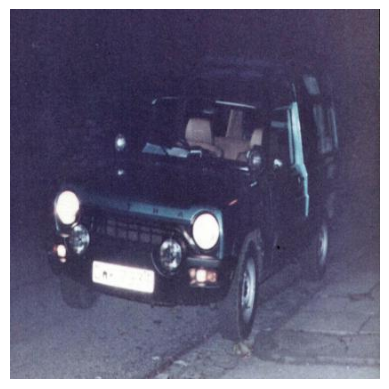

In [7]:
image_path = "/content/train/images/005980b3a5f93085_jpg.rf.2QZCXGReqcBORWQJKQfO.jpg"

# Read the image
img = mpimg.imread(image_path)

print(img.shape)
# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

In [8]:
# Load a pretrained YOLOv8 model
model = YOLO('yolov8n.pt')  # nano, small, medium, large, xlarge available

# Train the model
results = model.train(
    data='dataset.yaml',
    epochs=100,
    imgsz=640,
    batch=32,
    patience=10,
    lr0 = 0.001,
    optimizer = 'AdamW',
    translate=0.1,
    scale=0.5,
    shear=10,
    degrees = 15,
    flipud = 0.5,
    fliplr = 0.5,
    hsv_h = 0.05,
    hsv_s = 0.5,
    hsv_v = 0.4,
    name='ODM'
)

100%|██████████| 6.25M/6.25M [00:00<00:00, 102MB/s]


Ultralytics 8.3.154 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset.yaml, degrees=15, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.5, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.05, hsv_s=0.5, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=ODM, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, patience=10, perspective=0.0, plots=True, pose=12.0, pretrained=True, profile=Fal

100%|██████████| 755k/755k [00:00<00:00, 24.7MB/s]

Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 129 layers, 3,011,823 parameters, 3,011,807 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 99.7MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 901.8±462.4 MB/s, size: 29.7 KB)


train: Scanning /content/train/labels... 878 images, 0 backgrounds, 0 corrupt: 100%|██████████| 878/878 [00:00<00:00, 2379.84it/s]

train: New cache created: /content/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.3±0.6 ms, read: 624.0±219.4 MB/s, size: 33.0 KB)


val: Scanning /content/valid/labels... 250 images, 0 backgrounds, 0 corrupt: 100%|██████████| 250/250 [00:00<00:00, 1123.04it/s]

val: New cache created: /content/valid/labels.cache


Plotting labels to runs/detect/ODM/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/ODM
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      4.15G      1.596       3.22      1.846         60        640: 100%|██████████| 28/28 [00:16<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.21s/it]

                   all        250        454    0.00313      0.575     0.0473     0.0162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      4.94G      1.541      2.592      1.791         56        640: 100%|██████████| 28/28 [00:14<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.52it/s]

                   all        250        454      0.356      0.264      0.113     0.0444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      4.96G      1.539      2.396      1.815         50        640: 100%|██████████| 28/28 [00:13<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.36it/s]

                   all        250        454      0.351      0.324      0.159     0.0746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      4.97G      1.531       2.39      1.822         46        640: 100%|██████████| 28/28 [00:14<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.14s/it]

                   all        250        454     0.0781      0.254      0.112     0.0444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      4.99G      1.562      2.314      1.846         48        640: 100%|██████████| 28/28 [00:14<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.41it/s]

                   all        250        454     0.0567      0.215     0.0461     0.0167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      5.01G      1.576       2.35      1.828         50        640: 100%|██████████| 28/28 [00:14<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.48it/s]

                   all        250        454      0.141      0.213      0.124     0.0497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      5.02G      1.532      2.266      1.823         47        640: 100%|██████████| 28/28 [00:14<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.30it/s]

                   all        250        454      0.217      0.235      0.171     0.0904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      5.04G      1.488      2.173      1.777         61        640: 100%|██████████| 28/28 [00:14<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.04s/it]

                   all        250        454      0.342      0.224      0.184     0.0786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      5.06G      1.529      2.132       1.79         74        640: 100%|██████████| 28/28 [00:14<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.57it/s]

                   all        250        454      0.251      0.281      0.196     0.0857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      5.08G      1.475      2.105      1.734         48        640: 100%|██████████| 28/28 [00:14<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.50it/s]

                   all        250        454      0.119      0.297      0.197      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      5.09G      1.435       2.03      1.716         53        640: 100%|██████████| 28/28 [00:13<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.35it/s]

                   all        250        454      0.359      0.355      0.325      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      5.11G      1.464      2.006      1.736         49        640: 100%|██████████| 28/28 [00:14<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.23it/s]

                   all        250        454      0.406      0.322       0.31      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      5.13G      1.422      1.977      1.706         62        640: 100%|██████████| 28/28 [00:14<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.21it/s]

                   all        250        454      0.427      0.472      0.381      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      5.14G      1.437      1.943       1.71         69        640: 100%|██████████| 28/28 [00:14<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.47it/s]

                   all        250        454      0.383      0.357      0.339      0.192



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      5.16G      1.419      1.939       1.69         53        640: 100%|██████████| 28/28 [00:14<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.55it/s]

                   all        250        454      0.354      0.375      0.338      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      5.18G      1.396      1.875      1.666         56        640: 100%|██████████| 28/28 [00:14<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.27it/s]

                   all        250        454      0.569      0.402      0.425      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      5.19G      1.385      1.828      1.675         60        640: 100%|██████████| 28/28 [00:13<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.07s/it]

                   all        250        454      0.249       0.37      0.258       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      5.21G      1.365      1.806      1.659         66        640: 100%|██████████| 28/28 [00:14<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.51it/s]

                   all        250        454      0.407      0.389      0.375       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      5.23G      1.354       1.79      1.636         49        640: 100%|██████████| 28/28 [00:14<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.63it/s]

                   all        250        454      0.493       0.32      0.351      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      5.24G      1.376      1.795      1.652         41        640: 100%|██████████| 28/28 [00:14<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.53it/s]

                   all        250        454      0.475       0.44      0.445      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      5.26G      1.321      1.697      1.609         60        640: 100%|██████████| 28/28 [00:14<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.05s/it]

                   all        250        454      0.602      0.371      0.411      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      5.28G      1.324      1.728      1.599         61        640: 100%|██████████| 28/28 [00:14<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.35it/s]

                   all        250        454      0.597      0.388      0.468      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      5.29G      1.307      1.681        1.6         59        640: 100%|██████████| 28/28 [00:14<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.49it/s]

                   all        250        454      0.523      0.473      0.457      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      5.31G       1.31      1.641      1.599         55        640: 100%|██████████| 28/28 [00:14<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.36it/s]

                   all        250        454      0.406      0.358      0.287      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      5.33G      1.302      1.584      1.584         65        640: 100%|██████████| 28/28 [00:13<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.02s/it]

                   all        250        454      0.618      0.428      0.488      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      5.35G      1.284      1.594      1.581         70        640: 100%|██████████| 28/28 [00:13<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.19it/s]

                   all        250        454      0.491       0.56      0.525      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      5.37G      1.302      1.605      1.588         63        640: 100%|██████████| 28/28 [00:14<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.46it/s]

                   all        250        454      0.656      0.401      0.459      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      5.38G      1.302      1.566      1.586         48        640: 100%|██████████| 28/28 [00:14<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.41it/s]

                   all        250        454      0.473      0.458      0.397      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100       5.4G      1.254      1.501      1.551         54        640: 100%|██████████| 28/28 [00:14<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.25it/s]

                   all        250        454      0.742      0.427      0.507      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      5.42G      1.249      1.501      1.547         52        640: 100%|██████████| 28/28 [00:13<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.02s/it]

                   all        250        454      0.518      0.466      0.481      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      5.43G      1.258      1.528      1.573         41        640: 100%|██████████| 28/28 [00:14<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.47it/s]

                   all        250        454      0.506      0.519      0.502      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      5.45G       1.24      1.464      1.551         40        640: 100%|██████████| 28/28 [00:14<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.45it/s]

                   all        250        454      0.613      0.501      0.546      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      5.47G      1.246      1.456      1.538         38        640: 100%|██████████| 28/28 [00:14<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.34it/s]

                   all        250        454      0.393      0.502      0.467      0.254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      5.49G      1.239      1.461      1.554         42        640: 100%|██████████| 28/28 [00:14<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.06s/it]

                   all        250        454      0.541      0.411       0.45      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100       5.5G      1.235      1.465      1.532         33        640: 100%|██████████| 28/28 [00:14<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.38it/s]

                   all        250        454      0.581      0.484      0.492      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      5.52G      1.215      1.411      1.529         52        640: 100%|██████████| 28/28 [00:14<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.50it/s]

                   all        250        454      0.578      0.493      0.541      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      5.54G      1.226      1.464      1.551         60        640: 100%|██████████| 28/28 [00:14<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.46it/s]

                   all        250        454      0.633      0.489      0.533      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      5.55G      1.197      1.396      1.519         56        640: 100%|██████████| 28/28 [00:13<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.07s/it]

                   all        250        454      0.445      0.391      0.425      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      5.57G      1.208      1.368      1.512         62        640: 100%|██████████| 28/28 [00:13<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.50it/s]

                   all        250        454      0.573      0.457      0.483      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      5.59G      1.194      1.359      1.511         60        640: 100%|██████████| 28/28 [00:14<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.45it/s]

                   all        250        454      0.528      0.525      0.502      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100       5.6G      1.181      1.324      1.499         71        640: 100%|██████████| 28/28 [00:14<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.47it/s]

                   all        250        454      0.515      0.482      0.499      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      5.62G       1.18      1.346      1.493         47        640: 100%|██████████| 28/28 [00:13<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.03s/it]

                   all        250        454      0.576       0.52      0.517      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      5.64G      1.173      1.334      1.502         59        640: 100%|██████████| 28/28 [00:13<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.31it/s]

                   all        250        454      0.582      0.435      0.463      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      5.65G      1.169      1.288      1.482         54        640: 100%|██████████| 28/28 [00:13<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.53it/s]

                   all        250        454      0.435      0.457        0.4      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      5.67G       1.15      1.258      1.472         40        640: 100%|██████████| 28/28 [00:13<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.45it/s]

                   all        250        454      0.585      0.535      0.522      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      5.69G      1.176      1.278      1.508         57        640: 100%|██████████| 28/28 [00:13<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.32it/s]

                   all        250        454      0.555      0.511      0.538      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      5.71G      1.165      1.247      1.481         53        640: 100%|██████████| 28/28 [00:13<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.03s/it]

                   all        250        454      0.633      0.465      0.509      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      5.72G      1.153      1.242      1.457         64        640: 100%|██████████| 28/28 [00:13<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.33it/s]

                   all        250        454      0.685      0.448      0.526      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      5.74G      1.141      1.238      1.461         62        640: 100%|██████████| 28/28 [00:13<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.49it/s]

                   all        250        454      0.623      0.544      0.545      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      5.76G      1.129      1.232      1.457         59        640: 100%|██████████| 28/28 [00:14<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.50it/s]

                   all        250        454       0.58      0.482      0.483      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      5.78G      1.152      1.235      1.474         64        640: 100%|██████████| 28/28 [00:14<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.01s/it]

                   all        250        454       0.41      0.541      0.485      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      5.79G       1.17      1.255      1.481         62        640: 100%|██████████| 28/28 [00:13<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.43it/s]

                   all        250        454      0.583      0.497      0.506      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      5.81G      1.127      1.205       1.44         52        640: 100%|██████████| 28/28 [00:13<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.39it/s]

                   all        250        454      0.563      0.549      0.533       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      5.83G      1.113      1.161      1.424         51        640: 100%|██████████| 28/28 [00:14<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.58it/s]

                   all        250        454      0.569      0.468       0.51      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      5.84G      1.106      1.163      1.423         53        640: 100%|██████████| 28/28 [00:14<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.09it/s]

                   all        250        454      0.641      0.487      0.531      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      5.86G       1.11      1.129      1.424         53        640: 100%|██████████| 28/28 [00:13<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.11it/s]

                   all        250        454      0.552      0.481      0.484      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      5.88G      1.111      1.139      1.419         58        640: 100%|██████████| 28/28 [00:14<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.34it/s]

                   all        250        454      0.657      0.418      0.471      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      5.89G      1.111      1.137      1.435         48        640: 100%|██████████| 28/28 [00:14<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.41it/s]

                   all        250        454      0.632      0.426      0.506      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      5.91G      1.098      1.131      1.412         43        640: 100%|██████████| 28/28 [00:14<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.28it/s]

                   all        250        454      0.664      0.499      0.518      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      5.93G      1.096      1.123      1.418         57        640: 100%|██████████| 28/28 [00:13<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.02s/it]

                   all        250        454      0.551      0.566      0.534      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      5.95G      1.098      1.124      1.432         58        640: 100%|██████████| 28/28 [00:14<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.52it/s]

                   all        250        454      0.581      0.529      0.529      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      5.96G      1.088      1.105      1.416         49        640: 100%|██████████| 28/28 [00:14<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.42it/s]

                   all        250        454      0.554      0.575      0.522      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      5.98G      1.083      1.103      1.414         50        640: 100%|██████████| 28/28 [00:13<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.30it/s]

                   all        250        454       0.54      0.549      0.514      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100         6G      1.073      1.065       1.41         48        640: 100%|██████████| 28/28 [00:13<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.09s/it]

                   all        250        454      0.595      0.498      0.528      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      6.02G      1.052      1.067      1.391         60        640: 100%|██████████| 28/28 [00:14<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.43it/s]

                   all        250        454      0.743      0.474      0.562      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      6.03G      1.071      1.069      1.404         42        640: 100%|██████████| 28/28 [00:14<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.49it/s]

                   all        250        454      0.613      0.541      0.513      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      6.05G      1.076      1.065      1.395         61        640: 100%|██████████| 28/28 [00:14<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.45it/s]

                   all        250        454      0.541      0.535      0.521      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      6.07G      1.032      1.024      1.383         45        640: 100%|██████████| 28/28 [00:14<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.05s/it]

                   all        250        454      0.594      0.552      0.534      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      6.08G      1.045       1.04      1.377         56        640: 100%|██████████| 28/28 [00:13<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.38it/s]

                   all        250        454       0.57      0.462        0.5      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100       6.1G      1.031      1.015       1.38         58        640: 100%|██████████| 28/28 [00:14<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.54it/s]

                   all        250        454      0.638      0.501      0.531      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      6.12G      1.047      1.026      1.373         51        640: 100%|██████████| 28/28 [00:14<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.54it/s]

                   all        250        454      0.606      0.532      0.519      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      6.13G      1.021     0.9948      1.354         51        640: 100%|██████████| 28/28 [00:14<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.11it/s]

                   all        250        454      0.594      0.512      0.503      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      6.15G      1.056      1.014      1.374         48        640: 100%|██████████| 28/28 [00:14<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.09it/s]

                   all        250        454      0.604      0.545      0.532      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      6.17G      1.022     0.9813       1.36         41        640: 100%|██████████| 28/28 [00:14<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.32it/s]

                   all        250        454      0.638      0.535      0.556      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      6.19G      1.021     0.9707      1.368         60        640: 100%|██████████| 28/28 [00:14<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.48it/s]

                   all        250        454      0.605      0.525      0.508      0.353
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 65, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



75 epochs completed in 0.368 hours.
Optimizer stripped from runs/detect/ODM/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/ODM/weights/best.pt, 6.3MB

Validating runs/detect/ODM/weights/best.pt...
Ultralytics 8.3.154 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.66s/it]


                   all        250        454      0.752      0.474      0.562      0.385
             Ambulance         50         64      0.809      0.719      0.793      0.605
                   Bus         30         46      0.921      0.652      0.768      0.518
                   Car         90        238      0.684      0.219      0.415      0.277
            Motorcycle         42         46      0.565      0.478      0.421      0.232
                 Truck         38         60      0.783        0.3      0.415      0.292
Speed: 0.3ms preprocess, 2.6ms inference, 0.0ms loss, 9.7ms postprocess per image
Results saved to runs/detect/ODM


In [9]:
model = YOLO("/content/runs/detect/ODM/weights/best.pt")

In [10]:
# Validate the model
metrics = model.val(data='dataset.yaml', split='test')

Ultralytics 8.3.154 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,623 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 474.1±78.2 MB/s, size: 26.1 KB)


val: Scanning /content/test/labels... 126 images, 0 backgrounds, 0 corrupt: 100%|██████████| 126/126 [00:00<00:00, 2127.69it/s]

val: New cache created: /content/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.81it/s]


                   all        126        258      0.822      0.572      0.684      0.465
             Ambulance         18         18      0.952      0.889      0.975       0.77
                   Bus         22         38       0.74      0.601      0.701      0.511
                   Car         60        150      0.813      0.493       0.53      0.329
            Motorcycle         12         32      0.638      0.375      0.474      0.214
                 Truck         14         20      0.966        0.5       0.74      0.502
Speed: 2.6ms preprocess, 6.5ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to runs/detect/val


(416, 416, 3)


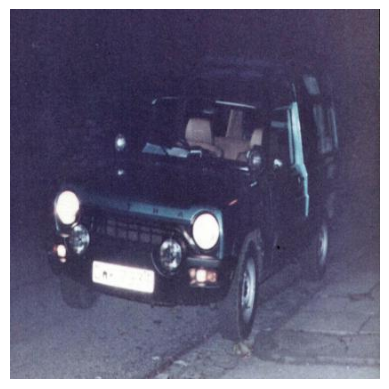

In [11]:
image_path = "/content/train/images/005980b3a5f93085_jpg.rf.2QZCXGReqcBORWQJKQfO.jpg"

# Read the image
img = mpimg.imread(image_path)

print(img.shape)
# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

In [12]:
# Make predictions
results = model('/content/test/images/00dea1edf14f09ab_jpg.rf.3f17c8790a68659d03b1939a59ccda80.jpg',conf = 0.5)


image 1/1 /content/test/images/00dea1edf14f09ab_jpg.rf.3f17c8790a68659d03b1939a59ccda80.jpg: 640x640 1 Ambulance, 8.0ms
Speed: 4.4ms preprocess, 8.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)


(416, 416, 3)


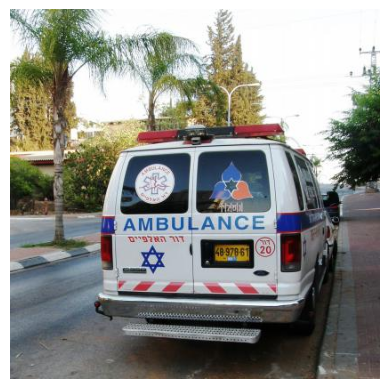

In [13]:
image_path = "/content/test/images/00dea1edf14f09ab_jpg.rf.3f17c8790a68659d03b1939a59ccda80.jpg"

# Read the image
img = mpimg.imread(image_path)

print(img.shape)
# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

(1200, 2400, 4)


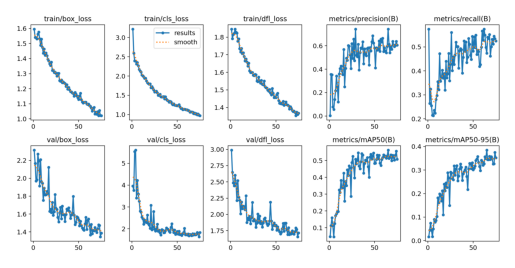

In [14]:
image_path = "/content/runs/detect/ODM/results.png"

# Read the image
img = mpimg.imread(image_path)

print(img.shape)
# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

In [15]:
images = Path("test/images")
detection_output = Path("output/detections")
counting_output = Path("output/counting")
detection_output.mkdir(parents=True, exist_ok=True)
counting_output.mkdir(parents=True, exist_ok=True)